In [1]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; }
.container {width:95% !important;}
</style>

<h1 style="text-align:center">Clase 2: Introducción a señales en tiempo discreto y sistemas en tiempo discreto</h1>
<h3 style="text-align:center">ACUS099: Procesamiento digital de señales</h3>
<p style="text-align:center">Dr. Víctor Poblete <br>
<a href="mailto:vpoblete@uach.cl">vpoblete@uach.cl</a><br>
<p style="text-align:center">Esteban Vargas <br>
<a href="mailto:vpoblete@uach.cl">esteban.vargas01@alumnos.uach.cl</a><br><br>
<a href="https://github.com/vpobleteacustica/ACUS099_Autumn_2024">https://github.com/vpobleteacustica/ACUS099_Autumn_2024</a><br> 
<a href="http://www.acusticauach.cl">www.acusticauach.cl</a><br>
<a href="http://www.aumilab.cl">www.aumilab.cl</a><br> 

## Indice 
+ [Señal](#id1)
    - [Representación digital del sonido](#id11)
    - [Indexando vectores en Numpy.](#id13)
    - [Arreglos básicos usando Numpy](#id14)
    - [Usando índices para asignar valores a filas y columnas](#id15)

## 1. Señal<a name='id1'></a>.

> + Una **señal** contiene información. Esa información puede estar relacionada con el comportamiento de un **sistema**. Eso nos permitiría a través de la señal poder **analizar** (comprender) un sistema.    
> + Además, se puede **sintetizar** (producir) una señal con el propósito de **comunicar** información entre humanos y máquinas.
> + La información que contiene una señal se puede representar de muchas formas, por ejemplo, como una forma de onda temporal, a través de un espectro, o de un espectrograma, y muchas otras más.
> + Lo increíblemente interesante es que esa información está **organizada** en ciertos patrones que varían ya sea en tiempo, en frecuencia (audio), o en el espacio (imagen).



### 1.1 Representación digital del sonido<a name='id11'></a>.

<!--- Inline HTML works too --->
<p style="text-align:center">
    <a title="Representación digital del sonido"><img src="RepresentacionDigitalSonido.png" width="600" height="600" alt="Tiny"></a>
    <strong>Figure 1. Una representación idealizada digital de sonido. Ref: <a href="https://processing.org/tutorials/sound/">https://processing.org/tutorials/sound/</a><br></strong>


> * Estructura de un archivo **WAV**.
    + El formato de archivo WAV es derivado de la especificación: Resource Interchange File Format (.riff) de Microsoft para el almacenamiento de archivos multimedia.
    + Este formato es uno de los más utilizados para almacenar muestras de sonidos.
    + Se almacenan las muestras una tras otra.
    + Un archivo WAV puede pensarse como una matriz de valores de punto flotante entre -1.0 y +1.0. 
    + Cada número representa el valor de la función de sonido en un instante de tiempo de muestreo. En otras palabras, los números son las muestras de una señal de audio.

<!--- Inline HTML works too --->
<p style="text-align:center">
    <a title="Representación digital del sonido"><img src="WAVFORMAT.png" width="400" height="400" alt="Tiny"></a>
    <strong>Figure 2. Formato clásico de un archivo wav. Ref: <a href="http://soundfile.sapp.org/doc/WaveFormat/">http://soundfile.sapp.org/doc/WaveFormat/</a><br></strong>

### 1.2 Indexando vectores (1D) en Numpy<a name='id13'></a>.

> + Numpy es una librería fundamental de Python.
> + Un tutorial completo de Numpy se puede consultar en: [tutorial Numpy](https://numpy.org/doc/stable/user/).
> + Una **lista** representa un concepto matemático súper importante: representa una secuencia **finita**. Lo podemos llamar un **vector** de valores.    
> + Podemos acceder a los elementos del vector a través de **índices**.
> + Para indexar un vector usamos corchetes (brackets).
> + La primera componente del **vector**, tiene índice 0, mientras que la última componente tiene índice -1.
> + Por ejemplo: vamos acrear un vector $x$ que contiene 10 valores que resultan de dividir el intervalo desde -$\pi$ a $\pi$ en 10 partes:

In [2]:
import numpy as np

x = np.linspace(-np.pi, np.pi, 5)
print(x)

[-3.14159265 -1.57079633  0.          1.57079633  3.14159265]


In [3]:
x.shape

(5,)

In [4]:
print(len(abs(x)))

5


> +  Método **append** para agregar elementos a una lista.

> + Si queremos conocer cualquier componente del vector $x$ lo vemos según el índice que ocupe en el vector:

In [5]:
print(x[0])   # Primera componente
print(x[2])   # tercera componente
print(x[-1])  # Última componente
print(x[-2])  # Penúltima componente

-3.141592653589793
0.0
3.141592653589793
1.5707963267948966


> + También, podemos seleccionar un rango de elementos:
>> + La sintaxis: "$i:j$", permite extraer desde la componente $i$-ésima hasta la componente $j$-ésima.  
>> + La sintaxis: "$i:n:j$", comienza en $i$, salta $n$ componentes, y llegamos hasta la componente $j$.

In [6]:
x = np.linspace(-50,50,5) 
print(x[:])       # el vector completo
print(x[1:4])     # segundo al cuarto elemento. El elemento 5 es excluyente
print(x[-1:0:-1]) # invierte el vector!

[-50. -25.   0.  25.  50.]
[-25.   0.  25.]
[ 50.  25.   0. -25.]


> + Supongamos que deseamos la parte del vector donde $x>2$. Una manera súper potente es crear una **máscara de valores lógicos 0 ó 1**, (False o True), que especifiquen si $x>2$, o no, y a continuación usar la máscara como un índice. Ejemplifiquemos ésto:

In [7]:
int(False)

0

In [8]:
int(True)

1

In [9]:
x = np.linspace(-50,50,5) 
print(x[:])
print(x[x>2])


[-50. -25.   0.  25.  50.]
[25. 50.]


In [10]:
x2 = np.append(x,60)
print(x2[:])

[-50. -25.   0.  25.  50.  60.]


### 1.3 Arreglos básicos usando Numpy<a name='id14'></a>.

> + En arreglo 2D, usamos notación de **filas** y **columnas**. 
> + Usamos ":" para indicar todas las filas, o bien, todas las columnas.

In [11]:
import numpy as np

A = np.array([[1, 2, 3],
             [4, 5, 6],
             [7, 8, 9]])
print(A[:])

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [12]:
A.shape

(3, 3)

In [13]:
print(A[0, 0])

1


In [14]:
print(A[-1,-1])

9


In [15]:
print(A[-2,-2])

5


In [16]:
print(A[0,:])

[1 2 3]


In [17]:
print(A[:,0])

[1 4 7]


### 1.4 Usando índices para asignar valores a filas y columnas<a name='id15'></a>.

In [18]:
B = np.zeros((3, 3))
print(B[:])

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [19]:
B[:, 0] = [1, 2, 3]  # asignamos nuevos valores a la columna 0
print(B[:])

[[1. 0. 0.]
 [2. 0. 0.]
 [3. 0. 0.]]


In [20]:
B[2, 2] = 12        # asignamos un único elemento
print(B[:])

[[ 1.  0.  0.]
 [ 2.  0.  0.]
 [ 3.  0. 12.]]


In [21]:
B[1] = 16           # asignamos el mismo valor 16 a toda la fila 1!
print(B[:])

[[ 1.  0.  0.]
 [16. 16. 16.]
 [ 3.  0. 12.]]


In [22]:
import pyaudio
import wave

chunk                  = 1024
formato                = pyaudio.paInt16
canales                = 1
tasa_sampleo           = 44100
segundos_grabados      = 5
nombre_archivo_salida  = "mivoz.wav"

p = pyaudio.PyAudio()

stream = p.open(format=formato,
                channels=canales,
                rate=tasa_sampleo,
                input=True,
                frames_per_buffer=chunk)

print("* grabando")

frames = []

for i in range(0, int(tasa_sampleo / chunk * segundos_grabados)):
    data = stream.read(chunk)
    frames.append(data)

print("* lista la grabación")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(nombre_archivo_salida, 'wb')
wf.setnchannels(canales)
wf.setsampwidth(p.get_sample_size(formato))
wf.setframerate(tasa_sampleo)
wf.writeframes(b''.join(frames))
wf.close()

* grabando
* lista la grabación


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
import librosa.display

from mpl_toolkits.mplot3d import Axes3D

x, sr = librosa.load('mivoz.wav')
ipd.Audio('mivoz.wav')

Text(0, 0.5, 'amplitude')

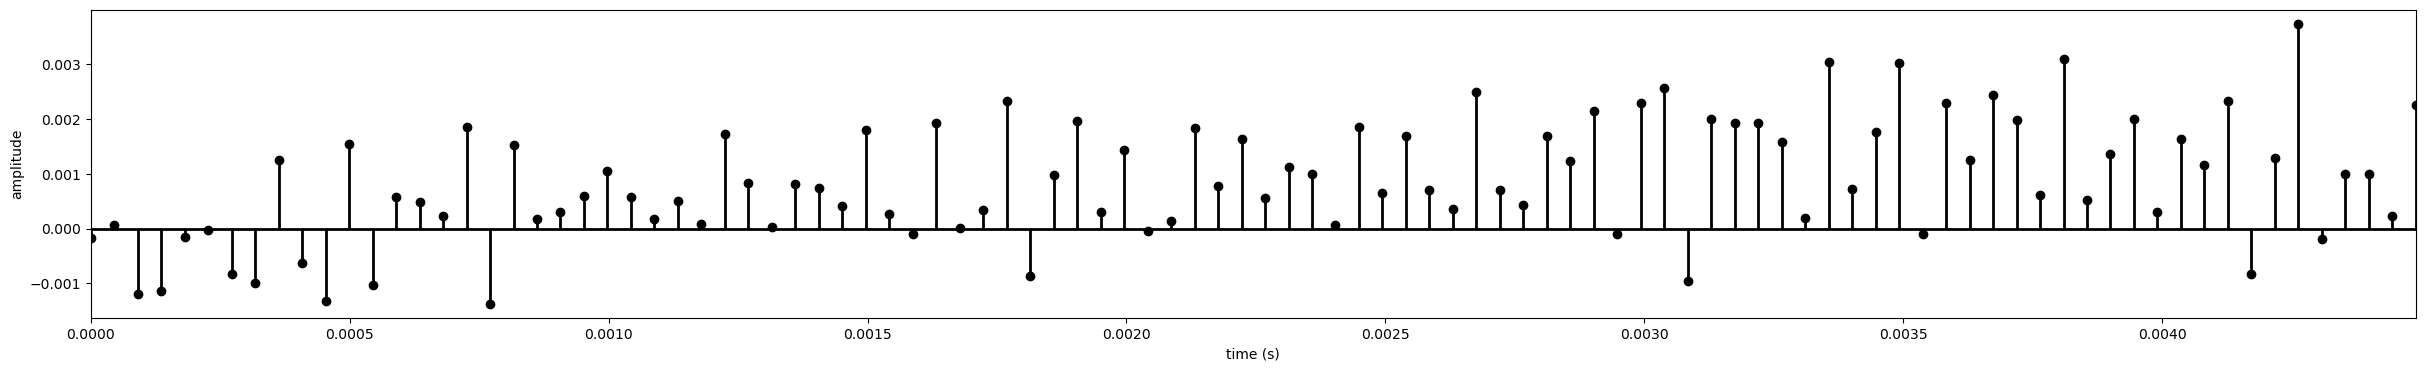

In [30]:
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np

t_inicial = 90000
t_final   = 90100
tiempo    = np.arange(len(x[t_inicial:t_final]))/float(sr)

plt.figure(figsize=(30, 4))

baseline = plt.stem(tiempo, x[t_inicial:t_final],'r',markerfmt='ro') 

plt.setp(baseline, color='k', linewidth=2)
plt.xlim(tiempo[0], tiempo[-1])
plt.xlabel('time (s)')
plt.ylabel('amplitude')

In [25]:
print(x[0:5])

[-0.0001214  -0.0007419  -0.00085492 -0.00071106 -0.00077323]


In [26]:
x.shape

(110080,)